In [85]:
import pandas as pd
import mne 
import pandas 
import glob 
import os 
from importlib import reload
import datamaking
reload(datamaking)
from datamaking import process_all_csv_files
from datamaking import plot_description_histogram
import matplotlib.pyplot as plt

# Step 1: Convert all edf files to .csv

In [42]:

# get the names of edf files 
edf_files = os.listdir("/Users/sumitpandey/Downloads/EEG-consciousness/EDF files/")
print(len(edf_files ))
i = 0
edf_file_path = "/Users/sumitpandey/Downloads/EEG-consciousness/EDF files/"+edf_files[i] # edf file path 
 
csv_file_path = "/Users/sumitpandey/Downloads/EEG-consciousness/input_data/train/"+edf_files[i][:-3]+'csv' # where the files will be saved 

41


In [16]:


# run a loop to convert the all edf files to .csv 

for i in range(len(edf_files)):
    edf_file_path = "/Users/sumitpandey/Downloads/EEG-consciousness/EDF files/"+edf_files[i]

    csv_file_path = "/Users/sumitpandey/Downloads/EEG-consciousness/input_data/"+edf_files[i][:-3]+'csv'
    convert_edf_to_csv(edf_file_path, csv_file_path)

Extracting EDF parameters from /Users/sumitpandey/Downloads/EEG-consciousness/EDF files/10GK-EDF+1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1209999  =      0.000 ...  4839.996 secs...
Extracting EDF parameters from /Users/sumitpandey/Downloads/EEG-consciousness/EDF files/01CX-EDF+.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77249  =      0.000 ...   308.996 secs...
Extracting EDF parameters from /Users/sumitpandey/Downloads/EEG-consciousness/EDF files/01CX-EDF+1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 898749  =      0.000 ...  3594.996 secs...
Extracting EDF parameters from /Users/sumitpandey/Downloads/EEG-consciousness/EDF files/09FN-EDF+.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1243249  =      0.000 ...  4972.996 secs...
Extracting EDF pa

### Step 2: Devide the dataset into two parts: training and testing dataset (for the time being i am doin this part manually)

# read few file show data:

In [51]:
csv_files = os.listdir('/Users/sumitpandey/Downloads/EEG-consciousness/input_data/train/')
len(csv_files)

35

In [53]:
from datamaking import print_csv_columns
i = 0
for i in range(len(csv_files)):
    csv_file_path = "/Users/sumitpandey/Downloads/EEG-consciousness/input_data/train/"+ csv_files[i]
    print(i, '  ---------', edf_files[i][:-3]+'csv', '------------')
    print_csv_columns(csv_file_path)

0   --------- 10GK-EDF+1.csv ------------
Columns in the CSV file: ['Unnamed: 0' 'EEG Fp1-REF' 'EEG Fp2-REF' 'EEG F3-REF' 'EEG F4-REF'
 'EEG C3-REF' 'EEG C4-REF' 'EEG P3-REF' 'EEG P4-REF' 'EEG O1-REF'
 'EEG O2-REF' 'EEG F7-REF' 'EEG F8-REF' 'EEG T7-REF' 'EEG T8-REF'
 'EEG P7-REF' 'EEG P8-REF' 'EEG T9-REF' 'EEG T10-REF' 'EEG Fz-REF'
 'EEG Cz-REF' 'EEG Pz-REF' 'EEG F10-REF' 'EEG F9-REF' 'EEG P9-REF'
 'EEG P10-REF' 'ECG EKG-REF' 'Photic-REF' 'Pulse Rate' 'IBI' 'Bursts'
 'Suppr' 'onset' 'duration' 'description']
1   --------- 01CX-EDF+.csv ------------
Columns in the CSV file: ['Unnamed: 0' 'EEG Fp1-REF' 'EEG Fp2-REF' 'EEG F3-REF' 'EEG F4-REF'
 'EEG C3-REF' 'EEG C4-REF' 'EEG P3-REF' 'EEG P4-REF' 'EEG O1-REF'
 'EEG O2-REF' 'EEG F7-REF' 'EEG F8-REF' 'EEG T7-REF' 'EEG T8-REF'
 'EEG P7-REF' 'EEG P8-REF' 'EEG T9-REF' 'EEG T10-REF' 'EEG Fz-REF'
 'EEG Cz-REF' 'EEG Pz-REF' 'EEG F10-REF' 'EEG F9-REF' 'EEG P9-REF'
 'EEG P10-REF' 'ECG EKG-REF' 'Photic-REF' 'Pulse Rate' 'IBI' 'Bursts'
 'Suppr' 'onset'


required columns: ['EEG Fp1-REF', 'EEG Fp2-REF', 'EEG F3-REF', 'EEG F4-REF',
        'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF',
        'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T7-REF', 'EEG T8-REF',
        'EEG P7-REF', 'EEG P8-REF', 'EEG T9-REF', 'EEG T10-REF', 'EEG Fz-REF',
        'EEG Cz-REF', 'EEG Pz-REF', 'EEG F10-REF', 'EEG F9-REF', 'EEG P9-REF',
        'EEG P10-REF', 'ECG EKG-REF', 'description']

### but some of these columns are missing



In [84]:
import os
import pandas as pd

# Define the folder path containing the CSV files
folder_path = '/Users/sumitpandey/Downloads/EEG-consciousness/input_data/train'

# List of required columns
required_columns = [
    'EEG Fp1-REF', 'EEG Fp2-REF', 'EEG F3-REF', 'EEG F4-REF',
    'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF',
    'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T7-REF', 'EEG T8-REF',
    'EEG P7-REF', 'EEG P8-REF', 'EEG T9-REF', 'EEG T10-REF', 'EEG Fz-REF',
    'EEG Cz-REF', 'EEG Pz-REF', 'EEG F10-REF', 'EEG F9-REF', 'EEG P9-REF',
    'EEG P10-REF', 'ECG EKG-REF', 'description'
]

# Initialize a dictionary to store files with missing columns
files_with_missing_columns = {}

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    print(filename)
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        
        # Read the CSV file
        try:
            df = pd.read_csv(file_path)
            
            # Check for missing columns
            missing_columns = [col for col in required_columns if col not in df.columns]
            
            if missing_columns:
                # Note down the file and missing columns if any
                files_with_missing_columns[filename] = missing_columns
                
        except Exception as e:
            print(f"Error reading {filename}: {e}")

# Print the results
for file, missing_cols in files_with_missing_columns.items():
    print(f"File: {file} is missing columns: {', '.join(missing_cols)}")


03TN-EDF+1.csv
06IP-EDF+.csv
11JU-EDF+4.csv
11JU-EDF+5.csv
03TN-EDF+2.csv
03TN-EDF+3.csv
12SG-EDF+.csv
11JU-EDF+2.csv
11JU-EDF+3.csv
04IW-EDF+.csv
03TN-EDF+4.csv
11JU-EDF+1.csv
03TN-EDF+5.csv
02IT-EDF+.csv
Error reading 02IT-EDF+.csv: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.
05IX-EDF+.csv
04IW-EDF+1.csv
12SG-EDF+2.csv
04IW-EDF+3.csv
10GK-EDF+.csv
04IW-EDF+2.csv
12SG-EDF+1.csv
04IW-EDF+6.csv
05IX-EDF+1.csv
04IW-EDF+5.csv
08KQ-EDF+.csv
05IX-EDF+2.csv
04IW-EDF+4.csv
01CX-EDF+1.csv
01CX-EDF+.csv
10GK-EDF+1.csv
11JU-EDF+.csv
07CN-EDF+.csv
06IP-EDF+1.csv
03TN-EDF+.csv
09FN-EDF+.csv
File: 04IW-EDF+.csv is missing columns: EEG T9-REF, EEG T10-REF, EEG F10-REF, EEG F9-REF, EEG P9-REF, EEG P10-REF
File: 05IX-EDF+.csv is missing columns: EEG T9-REF, EEG T10-REF, EEG F10-REF, EEG F9-REF, EEG P9-REF, EEG P10-REF
File: 04IW-EDF+1.csv is missing columns: EEG T9-REF, EEG T10-REF, EEG F10-REF, EEG F9-REF, EEG P9-REF, EEG P10-REF
File: 12SG-EDF+2.csv is

## these files are giving error: 

File: 04IW-EDF+.csv is missing columns: EEG T9-REF, EEG T10-REF, EEG F10-REF, EEG F9-REF, EEG P9-REF, EEG P10-REF

File: 05IX-EDF+.csv is missing columns: EEG T9-REF, EEG T10-REF, EEG F10-REF, EEG F9-REF, EEG P9-REF, EEG P10-REF

File: 04IW-EDF+1.csv is missing columns: EEG T9-REF, EEG T10-REF, EEG F10-REF, EEG F9-REF, EEG P9-REF, EEG P10-REF

File: 12SG-EDF+2.csv is missing columns: EEG T9-REF, EEG T10-REF, EEG F10-REF, EEG F9-REF, EEG P9-REF, EEG P10-REF

File: 04IW-EDF+3.csv is missing columns: EEG T9-REF, EEG T10-REF, EEG F10-REF, EEG F9-REF, EEG P9-REF, EEG P10-REF

File: 10GK-EDF+.csv is missing columns: EEG T9-REF, EEG T10-REF, EEG F10-REF, EEG F9-REF, EEG P9-REF, EEG P10-REF

File: 04IW-EDF+2.csv is missing columns: EEG T9-REF, EEG T10-REF, EEG F10-REF, EEG F9-REF, EEG P9-REF, EEG P10-REF

File: 04IW-EDF+6.csv is missing columns: EEG T9-REF, EEG T10-REF, EEG F10-REF, EEG F9-REF, EEG P9-REF, EEG P10-REF

File: 04IW-EDF+5.csv is missing columns: EEG T9-REF, EEG T10-REF, EEG F10-REF, EEG F9-REF, EEG P9-REF, EEG P10-REF

File: 08KQ-EDF+.csv is missing columns: EEG T9-REF, EEG T10-REF, EEG F10-REF, EEG F9-REF, EEG P9-REF, EEG P10-REF

File: 04IW-EDF+4.csv is missing columns: EEG T9-REF, EEG T10-REF, EEG F10-REF, EEG F9-REF, EEG P9-REF, EEG P10-REF

File: 10GK-EDF+1.csv is missing columns: EEG T9-REF, EEG T10-REF, EEG F10-REF, EEG F9-REF, EEG P9-REF, EEG P10-REF

File: 11JU-EDF+.csv is missing columns: EEG T9-REF, EEG T10-REF, EEG F10-REF, EEG F9-REF, EEG P9-REF, EEG P10-REF

File: 07CN-EDF+.csv is missing columns: EEG T9-REF, EEG T10-REF, EEG F10-REF, EEG F9-REF, EEG P9-REF, EEG P10-REF

File: 06IP-EDF+1.csv is missing columns: EEG T9-REF, EEG T10-REF, EEG F10-REF, EEG F9-REF, EEG P9-REF, EEG P10-REF

### solution ?? 
remove these columns. (for now it seems best solution)



In [60]:
import pandas as pd
import os

from datamaking import filter_csv
# Example usage
df = filter_csv(csv_file_path)  # Replace 'your_input_file.csv' with your actual input CSV file path


Unique values in 'description' column: ['Detections Inactive' 'Spontant åbne øjne'
 'en del muskelartefakter da pt bevæger hovedet'
 'Montage is now: ComAvgLwR' 'Montage is now: LongLwR'
 'Montage is now: TransLwR' 'Montage is now: Db Banan' 'Resting'
 'Tiltale-X' 'Tiltale-Y' 'bevæger hovedet']


In [88]:
from datamaking import process_all_csv_files

output_folder = '/Users/sumitpandey/Downloads/EEG-consciousness/filter_input_data/test'
input_folder = '/Users/sumitpandey/Downloads/EEG-consciousness/input_data/test'
process_all_csv_files(input_folder, output_folder='filtered_data', output_file_prefix='filtered_')



Processing file: 13IS-EDF+2.csv
Unique values in 'description' column: ['Setup Change' 'ACC N: On ']
Filtered CSV saved to 'filtered_data/filtered_13IS-EDF+2.csv'
Processing file: 13IS-EDF+3.csv
Unique values in 'description' column: ['Setup Change' 'ACC N: On ' 'Montage is now: ComAvg' 'Tiltale-X'
 'Tiltale-Y' 'Resting' 'pt suges' 'Kortvarig øjenåbning']
Filtered CSV saved to 'filtered_data/filtered_13IS-EDF+3.csv'
Processing file: 14LO-EDF+.csv
Unique values in 'description' column: ['Detections Inactive' 'Montage is now: ComAvg' 'Montage is now: Long'
 'Montage is now: Trans' 'Resting' 'Tiltale-X' 'Tiltale-Y' 'ACC N: On '
 'Elektrode forsøges rettet' 'Retter elektrode']
Filtered CSV saved to 'filtered_data/filtered_14LO-EDF+.csv'
Processing file: 13IS-EDF+1.csv
Unique values in 'description' column: ['00:00:34' 'Resting' 'Tiltale-X' 'Tiltale-Y']
Filtered CSV saved to 'filtered_data/filtered_13IS-EDF+1.csv'
Processing file: 13IS-EDF+.csv
Unique values in 'description' column: ['Detec

![Pasted Graphic.png](<attachment:Pasted Graphic.png>)
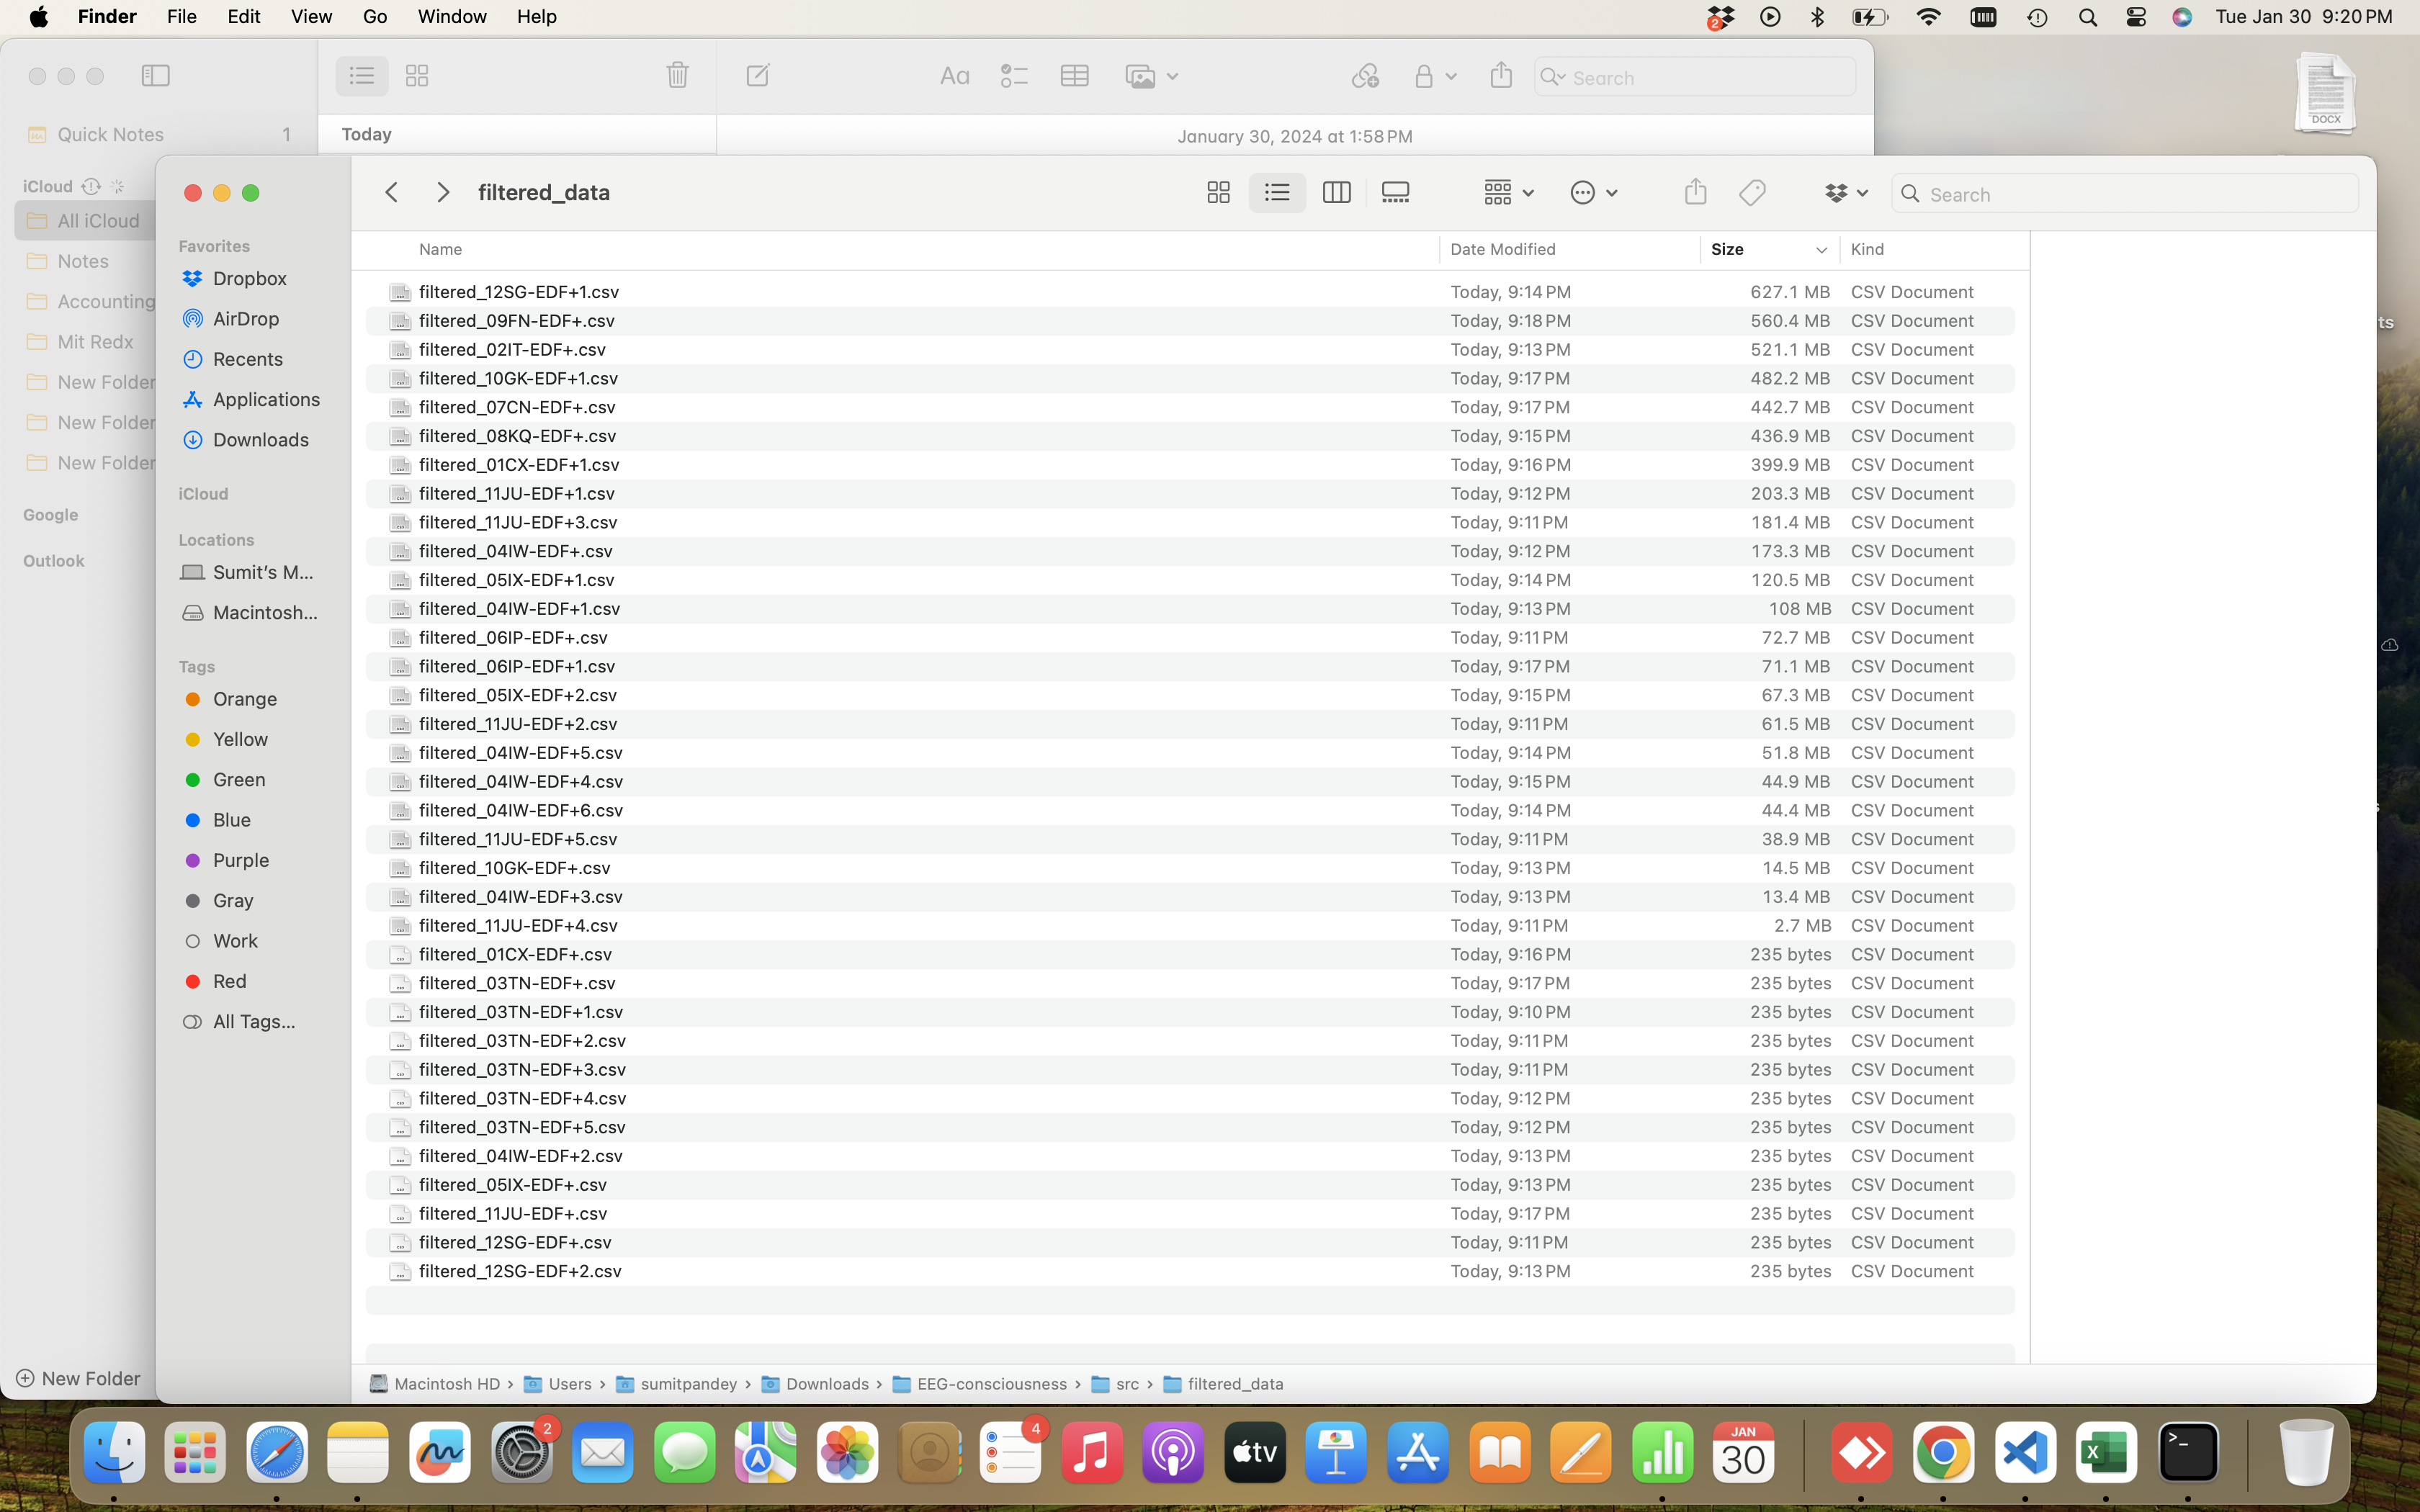

# Step 3: make a machine learning model
now data is ready and I think we shoudld go ahead and build ml pipeline: 